<h3>Convolutional Neural Networks (CNN) by using <b style="color: red">PyTorch</b></h3>

Filters convolutional formula where input image is RGB (three channels matrix):

\begin{equation*}
    (A * H)[m,n] = \sum_j \sum_k H[j,k] \cdot A[m-j,n-k]
\end{equation*}

Each filter is reponsible for <b>specified feature detection</b> from input image. Starts from the simplest elements like straight lines or edges, the next layers are responsible for detecting more complex features. With each new convolutional layer, there is more signal channels (more feature detection).

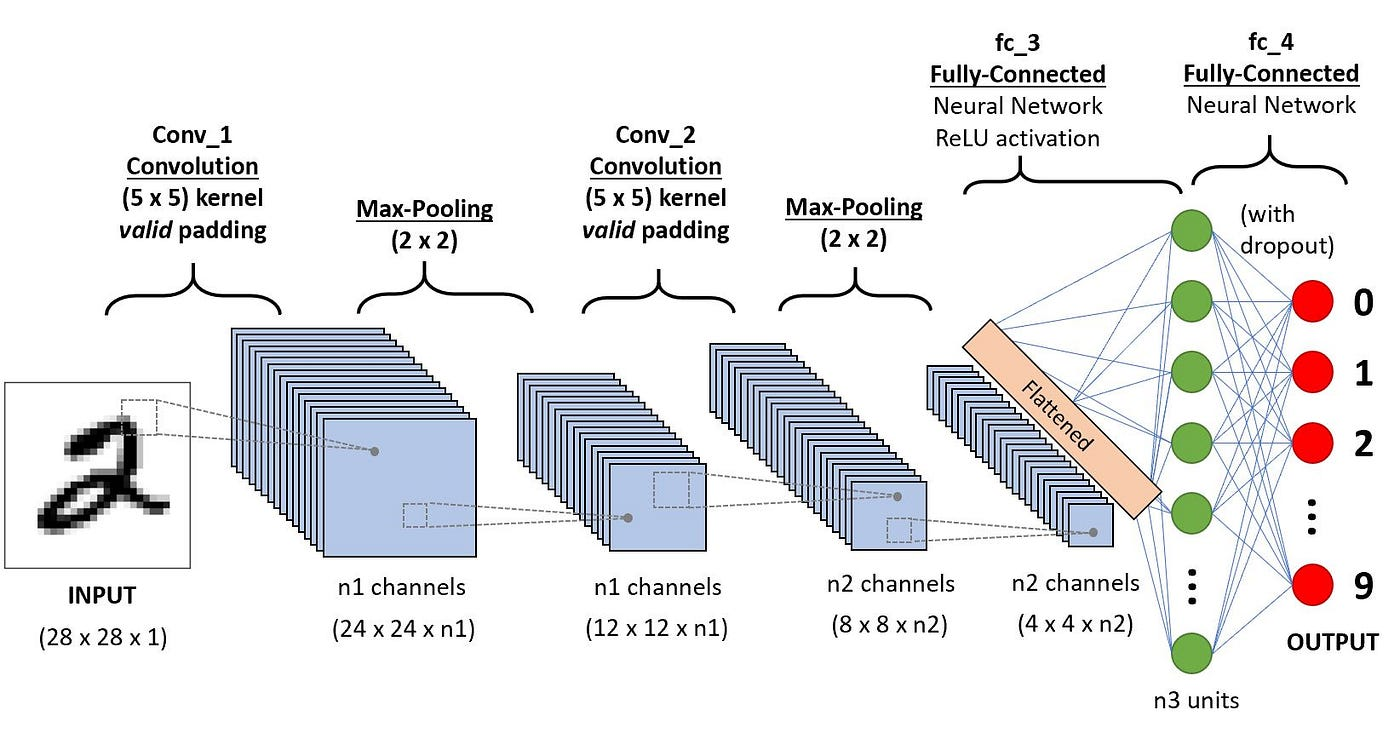

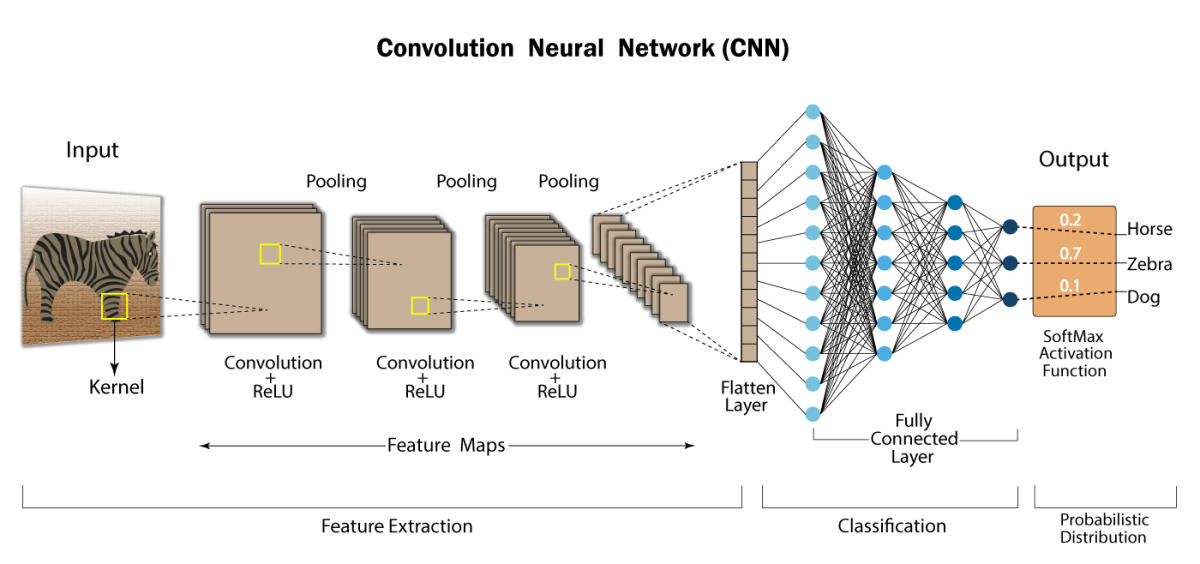

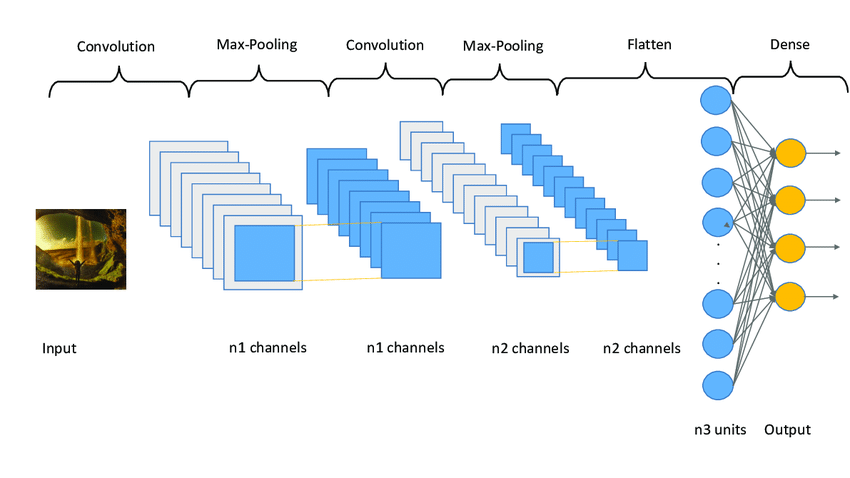

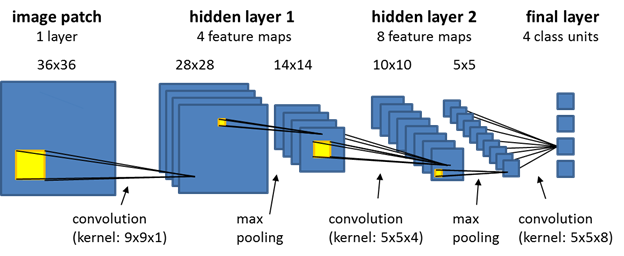

<b>The most common architecture is:</b>
- `Convolutional Layer` (doing the right convolution),
- `Activation Function` (ex.: ReLU (Rectified Linear Unit)),
- `MaxPooling` (dimension reduction),
- `Dropout` (turns off one neuron),
- `BatchNorm` (data normalization),
- `Flatten` (flattening the matrix to one vector - 1D Tensor),
- `Dense` (Linear layers like normal Neural Networks),
- Last `activation` function (Sigmoid or Softmax). 

Between convolutional blocks there is additional block called <b>Pooling Layer</b>, that is responsible for dimension reduction of the image that is passed to the next layer:
- max pooling - group of pixels is replaced by the highest one,
- average pooling - group of pixels is replaces by the average value,

Theres is also <b style="color:red">hyperparameters</b> that is responsible for regulation of convolutional neural networks, that weren't previously in the normal neural networks (simple linear neural networks):
- kernel_size - size of the filter (kernel),
- padding - is responsible for adding the frame to the filter/ kernel, that can resolve the problem connected to dimension reduction of the image,
- stride - describe when kernel/ filter will do next convolution,

<h3>Implementing the application by using:</h3>

- <b>PyTorch</b> - libraries used for building neural networks with embedded modules for different layers of neural networks, automatic gradient calculations (autograd) that are necessary for training neural networks,
- <b>Scikit-learn</b> - library with done implementations of machine learning algorithms, also datasets and metrics: <b style="color: blue">MNIST</b> - `datasets.load_digits` and splitting data method to test and training,
- <b>Optuna</b> - library that contains automatic tools for functio optimalization.

In [105]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import optuna

np.random.seed(10)
torch.manual_seed(10)

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Loading and splitting data:</h3>

In [61]:
digits = load_digits()
X = digits.images
y = digits.target
number_of_classes = (np.unique(y)).shape[0]

X_training, X_testing, y_training, y_testing = train_test_split(
    X, y, train_size=0.6
)
X_validation, X_testing, y_validation, y_testing = train_test_split(
    X_testing, y_testing, train_size=0.5
)

print(f"X training: \n{X_training}")
print(f"y training: \n{y_training}")

print(f"X testing: \n{X_testing}")
print(f"y testing: \n{y_testing}")

X training: 
[[[ 0.  0.  8. ...  6.  0.  0.]
  [ 0.  0.  8. ... 13.  2.  0.]
  [ 0.  2. 14. ... 14.  2.  0.]
  ...
  [ 0.  4. 16. ... 10.  0.  0.]
  [ 0.  1. 11. ...  8.  0.  0.]
  [ 0.  0.  4. ...  7.  0.  0.]]

 [[ 0.  1. 13. ... 16. 12.  1.]
  [ 0.  6. 16. ... 11.  5.  0.]
  [ 0.  2. 15. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  7. ...  4.  0.  0.]
  [ 0.  0. 15. ...  0.  0.  0.]]

 [[ 0.  0.  2. ...  8.  0.  0.]
  [ 0.  0. 12. ... 13.  0.  0.]
  [ 0.  0. 11. ... 16.  4.  0.]
  ...
  [ 0.  0.  0. ... 11.  9.  0.]
  [ 0.  2. 13. ... 11. 10.  0.]
  [ 0.  0.  2. ... 16.  2.  0.]]

 ...

 [[ 0.  0.  6. ...  0.  0.  0.]
  [ 0.  0.  8. ...  0.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  7. ... 12.  5.  1.]
  [ 0.  0.  6. ... 16. 16. 12.]]

 [[ 0.  0. 15. ...  0.  0.  0.]
  [ 0.  0. 15. ...  1.  0.  0.]
  [ 0.  0. 12. ...  1.  0.  0.]
  ...
  [ 0.  0.  1. ... 11.  0.  0.]
  [ 0.  0. 12. ...  9.  4.  0.]
  [ 0.  0. 15. 

<h4>y one hot encoding:<h4>

In [62]:
y_training_ohe = np.identity(number_of_classes)[y_training]
y_validation_ohe = np.identity(number_of_classes)[y_validation]

print(f"y training ohe: \n{y_training_ohe}")
print(f"y validation ohe: \n{y_validation_ohe}")

y training ohe: 
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
y validation ohe: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
# TRAINING ~ Converting to tensors.
X_training = torch.tensor(
    X_training.reshape(-1, 1, X_training.shape[1], X_training.shape[2])
)
y_training_ohe = torch.tensor(y_training_ohe)

# VALIDATION ~ Converting to tensors.
X_validation = torch.tensor(
    X_validation.reshape(-1, 1, X_validation.shape[1], X_validation.shape[2])
)
y_validation_ohe = torch.tensor(y_validation_ohe)

# TESTING ~ Converting to tensors.
X_testing = torch.tensor(X_testing.reshape(-1, 1, X_testing.shape[1], X_testing.shape[2]))

In [64]:
print(f"X training tensor: \n{X_training}")
print(f"y training ohe: \n{y_training_ohe}")
print(f"X validation tensor: \n{X_validation}")
print(f"y validation ohe: \n{y_validation_ohe}")
print(f"X testing tensor: \n{X_testing}")

X training tensor: 
tensor([[[[ 0.,  0.,  8.,  ...,  6.,  0.,  0.],
          [ 0.,  0.,  8.,  ..., 13.,  2.,  0.],
          [ 0.,  2., 14.,  ..., 14.,  2.,  0.],
          ...,
          [ 0.,  4., 16.,  ..., 10.,  0.,  0.],
          [ 0.,  1., 11.,  ...,  8.,  0.,  0.],
          [ 0.,  0.,  4.,  ...,  7.,  0.,  0.]]],


        [[[ 0.,  1., 13.,  ..., 16., 12.,  1.],
          [ 0.,  6., 16.,  ..., 11.,  5.,  0.],
          [ 0.,  2., 15.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  5.,  0.,  0.],
          [ 0.,  0.,  7.,  ...,  4.,  0.,  0.],
          [ 0.,  0., 15.,  ...,  0.,  0.,  0.]]],


        [[[ 0.,  0.,  2.,  ...,  8.,  0.,  0.],
          [ 0.,  0., 12.,  ..., 13.,  0.,  0.],
          [ 0.,  0., 11.,  ..., 16.,  4.,  0.],
          ...,
          [ 0.,  0.,  0.,  ..., 11.,  9.,  0.],
          [ 0.,  2., 13.,  ..., 11., 10.,  0.],
          [ 0.,  0.,  2.,  ..., 16.,  2.,  0.]]],


        ...,


        [[[ 0.,  0.,  6.,  ...,  0.,  0.,  0

<h3>Creating Convolutional Neural Network (CNN) called ConvNet</h3>

ConvNet must derived from `torch.nn.Module` that will have two methods:
- constructor `__init__()` - that will describe our architecture on Convolutional Neural Network; we will use layers like: `torch.nn.Linear`, `torch.nn.ReLU`, `torch.nn.Dropout`, `torch.nn.Softmax` or `torch.nn.Sequential`, but we will use also new, characteristic layers for Convolutional Neural Networks:
    * `torch.nn.Conv2d` - responsible for right convolution between filters and image fragments: needs parameters like number of input/output channels, size of the filter, padding and stride,
    * `torch.nn.Batchnorm` - responsible for batch normalization, on images (2D) and 1D tensors,
    * `torch.nn.Flatten` - responsible for flattening 2D input signal to 1D tensor.
- `forward()` method - responsible for flow of data between layers.

<b>Architectur of our Convolutional Neural Network:</b>

2 x (`Conv2D` -> `BatchNorm2d` -> `Dropout` -> `ReLU`) -> `Flatten` -> `Linear` -> `BatchNorm1d` -> `Dropout` -> Softmax

After the first convolution we will have 4 channels, after second we will have 8 (`num_conv_channels`).

Propability of neuron disable is 0.25.

- Dimension of the image after convolution:
\begin{equation*}
    sample\_size_{\textrm{new}} = \frac{sample\_size_{\textrm{original}} + 2 \cdot padding - kernel\_size}{stride} + 1 
\end{equation*}
- `BatchNorm2d` as a argument of `num_features` needs number of channels that analysed in data dimension, 
- `BatchNorm1d` - needs number of neurons from the last linear layer,
- All neecessary data are passed via constructor as arguments.


In [73]:
class ConvNet(torch.nn.Module):
    def __init__(self, input_channels, 
                 sample_size, output_layer_size, 
                 kernel_size, padding, stride):
        """
        - input_channels - number of channels in input images (scalar, int),
        - sample_size - dimension of the input image (scalar, int),
        - output_layer_size - number of neurons on the last layer (scalar, int),
        - kernel_size - dimension of the kernel/ filter for convolution (scalar, int),
        - padding - thicknes of the zero frame added to the image frame (scalar, int),
        - stride - pixel duration when convolution is done (scalar, int)
        """
        super().__init__()
        number_of_convolution_channels = [4, 8] 
        
        size1 = (sample_size + 2*padding - kernel_size)/stride + 1
        size2 = int((size1 + 2*padding - kernel_size)/stride + 1)
        
        # FIRST LAYER
        self.first_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                 in_channels=input_channels,
                 out_channels=number_of_convolution_channels[0],
                 kernel_size=kernel_size,
                 padding=padding,
                 stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=number_of_convolution_channels[0]),
            torch.nn.Dropout(0.25),
            torch.nn.ReLU() 
            )
        
        # SECOND LAYER
        self.second_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                 in_channels=number_of_convolution_channels[0],
                 out_channels=number_of_convolution_channels[1],
                 kernel_size=kernel_size,
                 padding=padding,
                 stride=stride
            ),
            torch.nn.BatchNorm2d(num_features=number_of_convolution_channels[1]),
            torch.nn.Dropout(0.25),
            torch.nn.ReLU() 
            )
        
        # THIRD LAYER
        self.third_layer = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(
                 in_features=size2 * size2 * 8,
                 out_features=output_layer_size
            ),
            torch.nn.BatchNorm1d(num_features=output_layer_size),
            torch.nn.Dropout(0.25),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, X):
        """
        Describes the flow of data in Convolutional Neural Network.
        Parameter: X - input data, images in type torch.tensor, shape=(num_samples, input_channels, sample_size, sample_size)
        Return: X - output/ response data in probability format, torch.tensor, shape=(sum_samples, num_classes)
        """
        X = self.first_layer(X)
        X = self.second_layer(X)
        X = self.third_layer(X)
        return X

<h3>Testing if our Convolutional Neural Network is working right (semantic, numerical => the shapes of tensors are correct that are transfered between layers).</h3>

In [76]:
cnn_model = ConvNet(
    input_channels=1,
    sample_size=X_validation.shape[2],
    output_layer_size=number_of_classes,
    kernel_size=3,
    padding=0,
    stride=1
)
cnn_model = cnn_model.double()
prediction = cnn_model(X_validation)

print(f"Example CNN model's prediction: \n{prediction}")

Example CNN model's prediction: 
tensor([[0.1744, 0.0449, 0.1048,  ..., 0.1057, 0.1076, 0.1057],
        [0.3085, 0.0234, 0.0473,  ..., 0.0234, 0.1877, 0.0218],
        [0.3498, 0.0097, 0.0417,  ..., 0.0615, 0.2761, 0.0046],
        ...,
        [0.0285, 0.3086, 0.0076,  ..., 0.1779, 0.1667, 0.0227],
        [0.1609, 0.1493, 0.0980,  ..., 0.0815, 0.1139, 0.1139],
        [0.0852, 0.0852, 0.2675,  ..., 0.0387, 0.0852, 0.0852]],
       dtype=torch.float64, grad_fn=<SoftmaxBackward0>)


Generated results are matrix (list of vectors) where each vector contains probability of being instance in the specific class.

<h3>Training of Convolutional Neural Network:</h3>

Tranining by using `Adam` optimization algorithm, that needs reference to the parameters (`params` from method `parameters()` on the instance of `ConvNet`), learning constant $\alpha$ (parameter `lr` - constant value 0.005), and constant regularization value $\lambda$ (parameter `weight_decay` - constant value 0.001), as a <b>cost function</b> we will use <b>`CrossEntropyLoss`</b>. 

In [95]:
def train_cnn(X_training, y_training,
              X_validation, y_validation,
              number_of_classes,
              kernel_size=3, padding=0, stride=1, lambdA=0.001,
              if_plot=True):
    cnn_model = ConvNet(
        input_channels = X_training.shape[1],
        sample_size = X_training.shape[2],
        output_layer_size = number_of_classes,
        kernel_size = kernel_size,
        padding = padding,
        stride = stride
    )
    cnn_model = cnn_model.double()
    
    loss_training_vector = []
    loss_validation_vector = []
    
    criterion_cross_entropy_loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=cnn_model.parameters(), lr=0.005, weight_decay=lambdA) 
    
    for i in range(1000):
        if if_plot:
            cnn_model.eval()
            with torch.no_grad():
                prediction = cnn_model(X_validation)
                loss_validation = criterion_cross_entropy_loss(prediction, y_validation)
                loss_validation_vector.append(loss_validation.detach().numpy())
        cnn_model.train()
        prediction = cnn_model(X_training)
        loss_training = criterion_cross_entropy_loss(prediction, y_training)
        loss_training.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_training_vector.append(loss_training.detach().numpy())
        
    if if_plot:
        print(f"Training of Convolutional Neural Network")
        figure, axis = plt.subplots()
        axis.plot(loss_training_vector, color='k')
        axis.plot(loss_validation_vector, color='r')
        axis.set_title("Learning curves")
        axis.set_xlabel("Iteration")
        axis.legend(["Cost on training data", "Cost on validation data"])
        
    return cnn_model 

In [98]:
cnn_model = train_cnn(
    X_training=X_training,
    y_training=y_training_ohe,
    X_validation=X_validation,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes,
    if_plot=False
)

prediction = cnn_model(X_validation)

print(f"Example prediction on validation data (after training): \n{prediction}")

Example prediction on validation data (after training): 
tensor([[2.7266e-05, 9.2828e-05, 5.3659e-05,  ..., 5.9426e-05, 1.1958e-03,
         1.1958e-03],
        [7.0991e-01, 1.2648e-02, 6.1934e-02,  ..., 3.9279e-04, 1.3324e-02,
         5.9085e-03],
        [5.6458e-03, 1.5018e-02, 7.3736e-03,  ..., 7.8164e-02, 7.7347e-01,
         1.6856e-02],
        ...,
        [8.8331e-03, 4.1089e-02, 9.2659e-01,  ..., 8.8331e-03, 3.3313e-03,
         1.9746e-03],
        [2.3076e-01, 1.2608e-02, 1.2832e-01,  ..., 2.1040e-02, 6.2935e-03,
         7.5465e-04],
        [1.9192e-04, 8.8858e-05, 5.2456e-04,  ..., 3.1527e-05, 5.2456e-04,
         3.7506e-05]], dtype=torch.float64, grad_fn=<SoftmaxBackward0>)


<h3>Prediction:</h3>

Implementing the function that analysis returned probability from the Convolutional Neural Network and returns numbers of specific classes, that images must be mapped. By using `torch.argmax()` we can find an <b>index</b> to which CNN gives the highest probability. 

In [100]:
def prediction_cnn(X, cnn_model):
    """
    Parameters:
    - X - input data (torch tensor, shape=(num_samples, num_features)),
    - cnn_model - Convolutional Neural Network model,
    Returns: 
    - prediction - id of predicted class
    """
    prediction_result = torch.argmax(cnn_model(X), dim=1)
    return prediction_result.detach().numpy()

<h3>Testing our prediction function:</h3>

In [103]:
prediciton_result = prediction_cnn(X=X_validation, cnn_model=cnn_model)

print(f"Example predictions on validation data: \n{prediciton_result}")

Example predictions on validation data: 
[6 0 5 8 3 7 7 4 9 3 9 6 0 4 6 1 8 1 1 0 2 6 9 9 1 3 7 6 5 2 7 1 1 7 7 4 7
 0 5 4 6 2 3 3 7 6 3 2 0 2 4 2 8 0 6 6 4 6 1 7 2 0 3 2 4 4 9 0 2 9 3 2 6 6
 8 0 4 8 8 2 9 6 1 4 0 4 7 0 4 7 7 0 4 4 2 2 3 5 5 1 2 2 9 6 1 8 4 6 4 8 3
 2 3 9 7 1 0 3 2 8 1 5 7 2 2 3 4 6 0 0 0 1 1 2 9 8 5 6 5 4 9 0 9 3 5 7 6 3
 6 6 7 7 0 4 8 0 4 8 0 0 6 7 1 5 1 9 2 0 4 1 9 1 3 4 1 4 6 9 4 4 5 0 7 0 7
 0 4 0 1 5 6 8 2 3 1 4 9 5 5 2 9 5 4 8 8 3 3 5 0 1 7 7 9 4 1 6 8 3 1 0 8 7
 7 5 3 1 2 9 1 6 9 2 6 9 3 6 2 6 7 0 7 9 3 5 3 6 9 1 0 8 0 7 2 2 1 8 5 3 0
 8 8 4 2 2 3 3 5 2 1 3 5 9 0 5 0 8 0 1 9 1 7 6 2 0 0 3 8 1 1 8 5 6 1 4 8 0
 9 6 8 5 5 9 3 4 4 3 1 9 7 4 8 3 6 8 2 4 6 6 1 4 2 8 1 0 6 4 5 8 2 0 9 4 0
 9 1 9 2 9 1 7 5 3 7 4 6 2 8 6 4 7 0 7 0 9 7 9 2 0 3]


<h3>Using <b>Optuna</b> to find the best hyperparameters</h3>

Implementing the `objective` function, that defines which parameters we are going to optimize. Needs which parameters must be optimized and how to do it (metric).

We need such a hyperparameters:
- <b>kernel_size</b>,
- <b>padding</b>,
- <b>stride</b>,

`objective` function needs to have:
- `trial.suggest_int` defines the range of values of different hyperparameters, that we would like to analyze (in our case wee need integer values),
- `forward pass` on validation data:
    * creating instance of the ConvNet and training it with specified parameters (chosen one by Optuna) set of hyperparameters,
    * making prediction (function `pred_cnn`) on validation data,
- calculating and returning accuracy precision.


In [109]:
def objective(trial, # internal Optune's parameter
              X_training, y_training, 
              X_validation, y_validation, 
              number_of_classes):
    
    kernel_sizes = trial.suggest_int("kernel_size", 1, 3, log=False)
    paddings = trial.suggest_int("padding", 0, 3, log=False)
    strides = trial.suggest_int("stride", 1, 3, log=False)
    cnn_model = train_cnn(
        X_training=X_training,
        y_training=y_training,
        X_validation=X_validation,
        y_validation=y_validation,
        number_of_classes=number_of_classes,
        kernel_size=kernel_sizes,
        padding=paddings,
        stride=strides,
        if_plot=False
    )
    prediction_results = prediction_cnn(X_validation, cnn_model)
    accuracy = np.mean(prediction_results==np.where(y_validation==1)[1])*100
    return accuracy

In [114]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(
    trial,
    X_training=X_training,
    y_training=y_training_ohe,
    X_validation=X_validation,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes),
    n_trials=5)

[I 2023-11-21 19:27:53,922] A new study created in memory with name: no-name-59542762-be48-48b6-855f-12edb996d19a
[I 2023-11-21 19:28:01,180] Trial 0 finished with value: 23.676880222841227 and parameters: {'kernel_size': 1, 'padding': 0, 'stride': 2}. Best is trial 0 with value: 23.676880222841227.
[I 2023-11-21 19:28:18,174] Trial 1 finished with value: 60.16713091922006 and parameters: {'kernel_size': 2, 'padding': 3, 'stride': 2}. Best is trial 1 with value: 60.16713091922006.
[I 2023-11-21 19:28:27,655] Trial 2 finished with value: 43.73259052924791 and parameters: {'kernel_size': 2, 'padding': 2, 'stride': 3}. Best is trial 1 with value: 60.16713091922006.
[I 2023-11-21 19:29:33,723] Trial 3 finished with value: 72.14484679665738 and parameters: {'kernel_size': 1, 'padding': 2, 'stride': 1}. Best is trial 3 with value: 72.14484679665738.
[I 2023-11-21 19:30:35,546] Trial 4 finished with value: 77.71587743732591 and parameters: {'kernel_size': 3, 'padding': 2, 'stride': 1}. Best i

In [113]:
print(f"The highest accuracy during optimization: {study.best_value}")

optimal_kernel_size = study.best_params["kernel_size"]
optimal_padding = study.best_params["padding"]
optimal_stride = study.best_params["stride"]

print(f"The best kernel size: {optimal_kernel_size}")
print(f"The best padding size: {optimal_padding}")
print(f"The best stride: {optimal_stride}")

The highest accuracy during optimization: 79.10863509749304
The best kernel size: 3
The best padding size: 0
The best stride: 1


<h3><b>Final testing of Convolutional Neural Network:</b></h3>

Training of Convolutional Neural Network


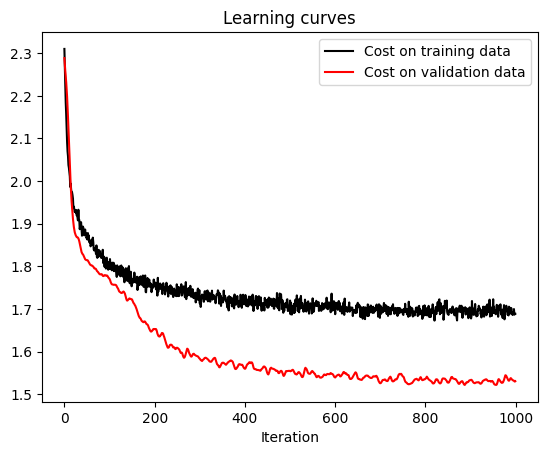

In [115]:
cnn_model = train_cnn(
    X_training=X_training,
    y_training=y_training_ohe,
    X_validation=X_validation,
    y_validation=y_validation_ohe,
    number_of_classes=number_of_classes,
    kernel_size=optimal_kernel_size,
    padding=optimal_padding,
    stride=optimal_stride
)

<h3>Predicting and testing:</h3>

In [126]:
prediction_result = prediction_cnn(X_validation, cnn_model)
accuracy = np.mean(prediciton_result==y_validation)
print(f"Accuracy of the CNN model on the validation data: {accuracy*100} [%]")

prediction_result = prediction_cnn(X_testing, cnn_model)
accuracy = np.mean(prediction_result==y_testing)
print(f"Accuracy of the CNN model on the testing data: {accuracy*100} [%]")

Accuracy of the CNN model on the validation data: 81.89415041782729 [%]
Accuracy of the CNN model on the testing data: 75.27777777777777 [%]


<h3>Using <b>AlexNet</b> architecture CNN</h3>

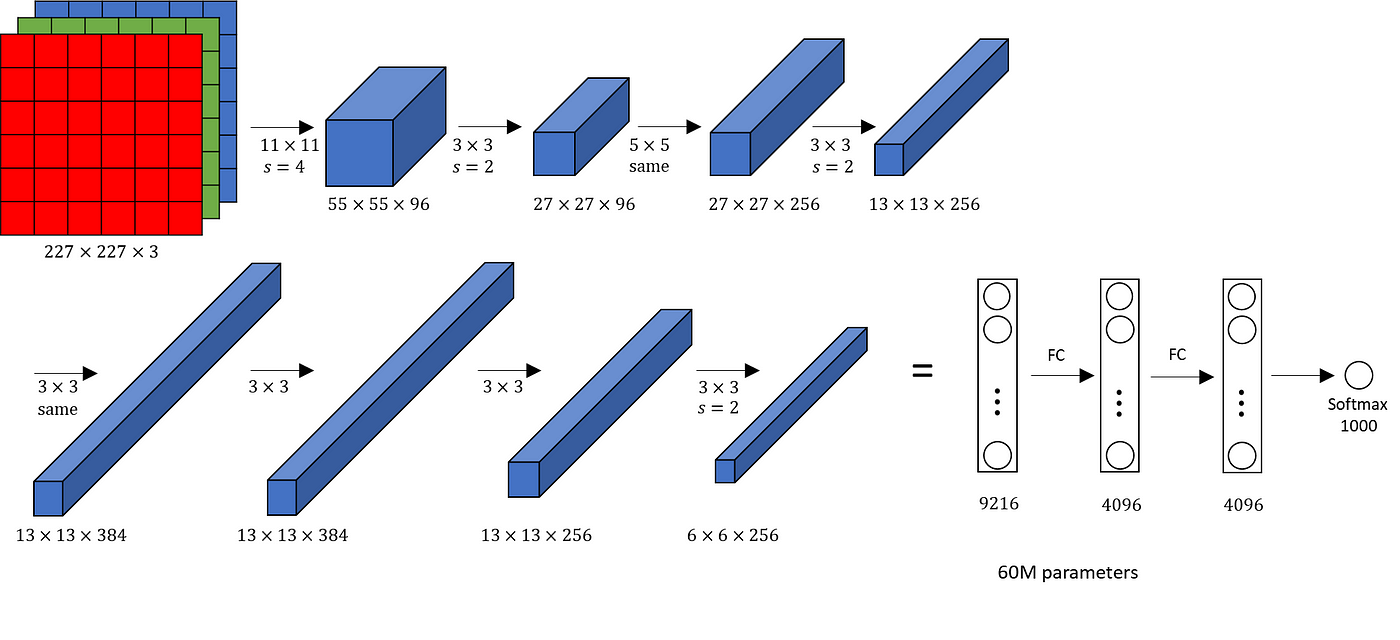
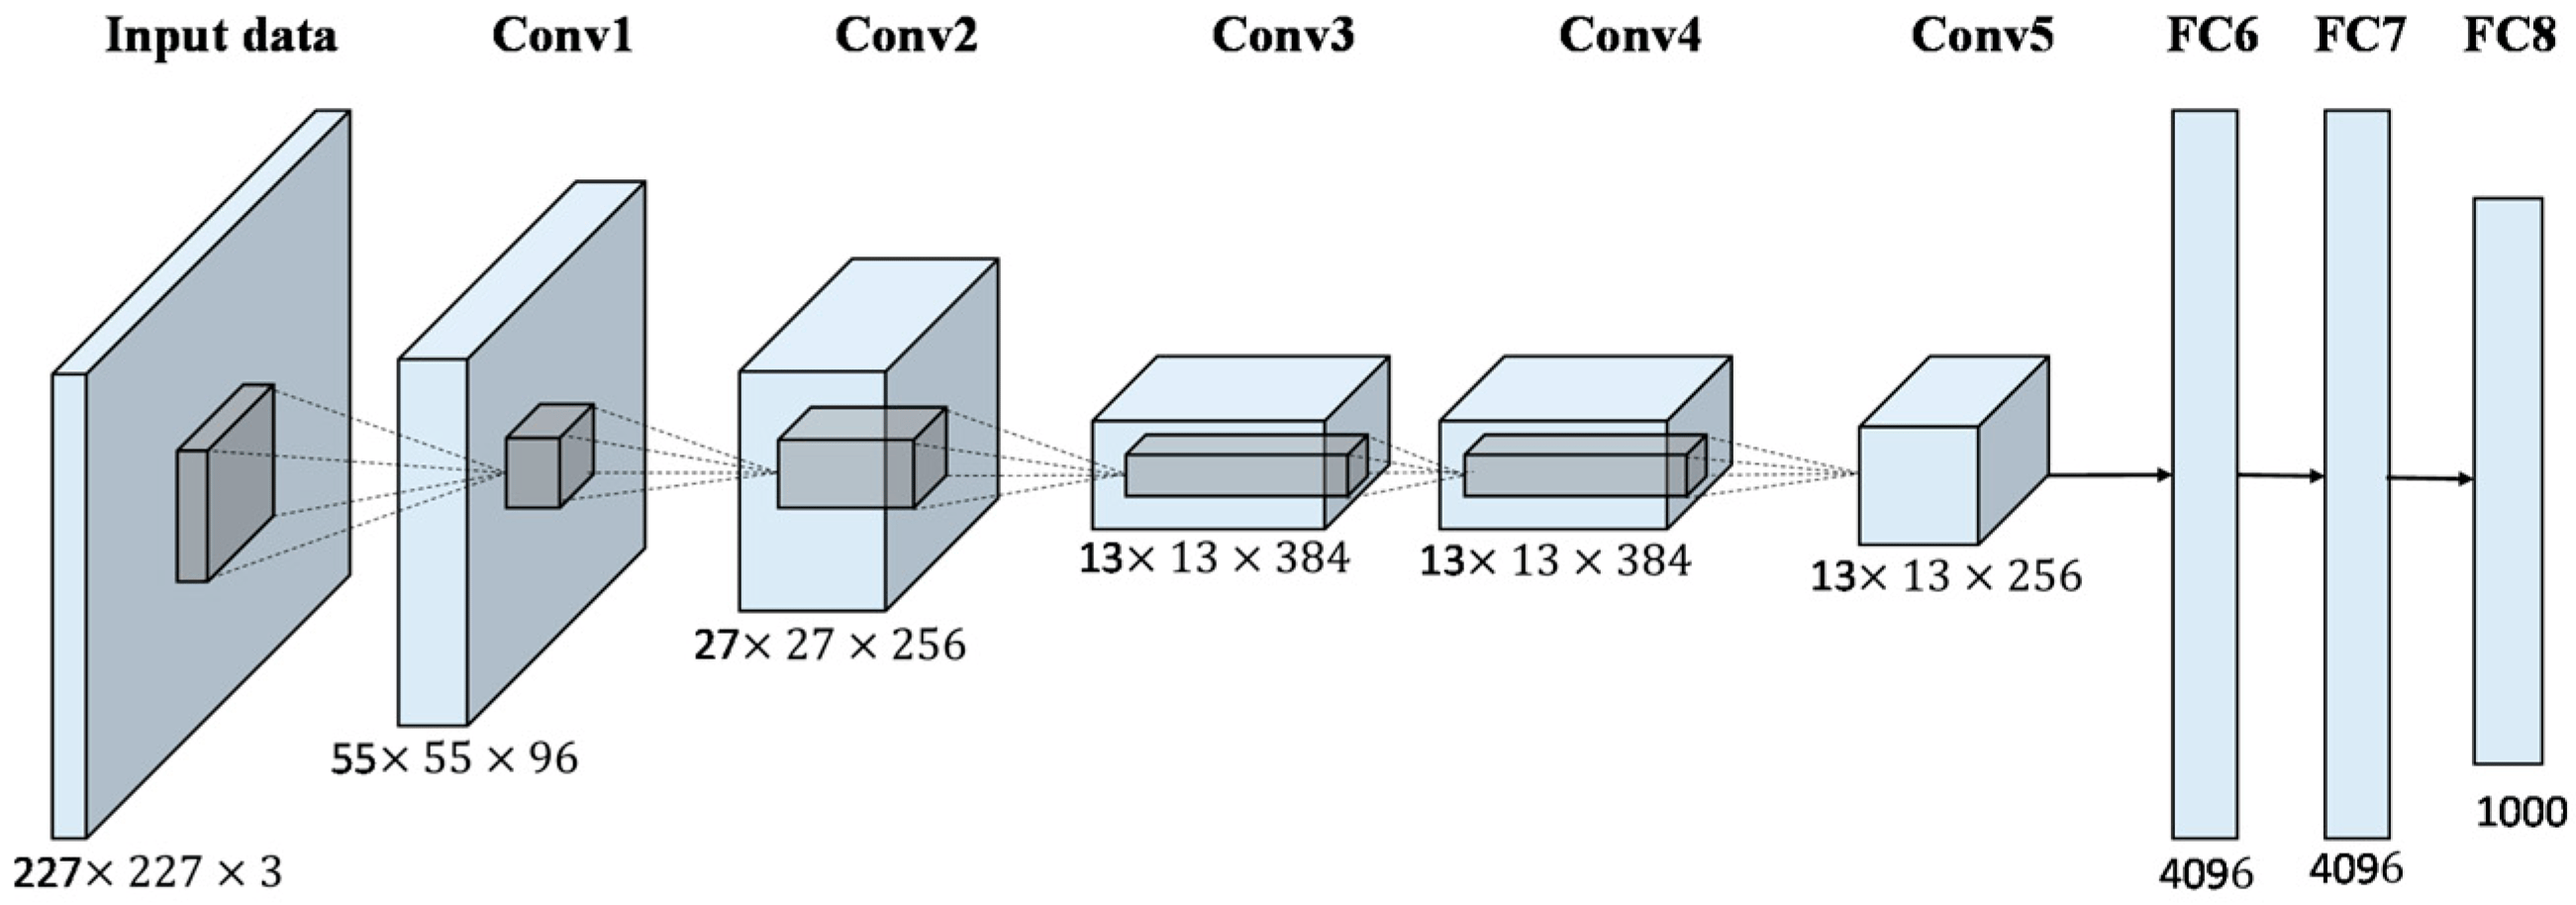
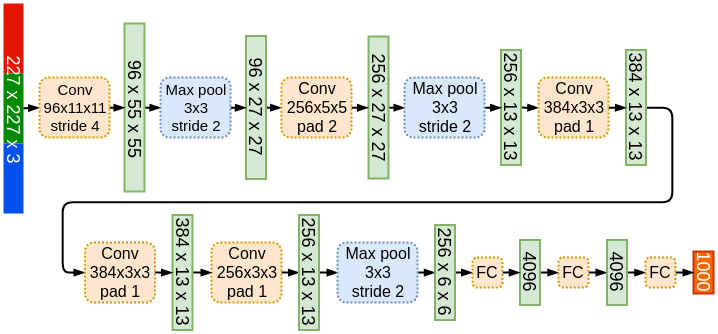
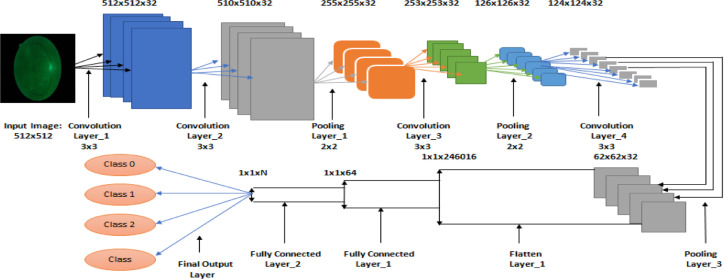
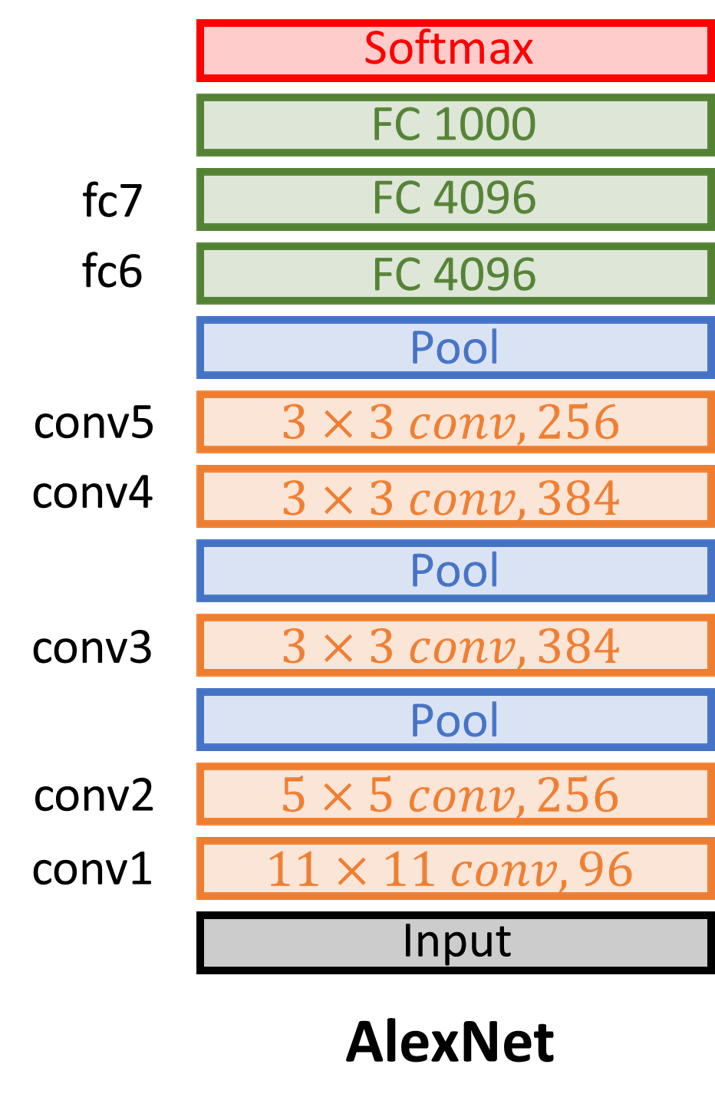
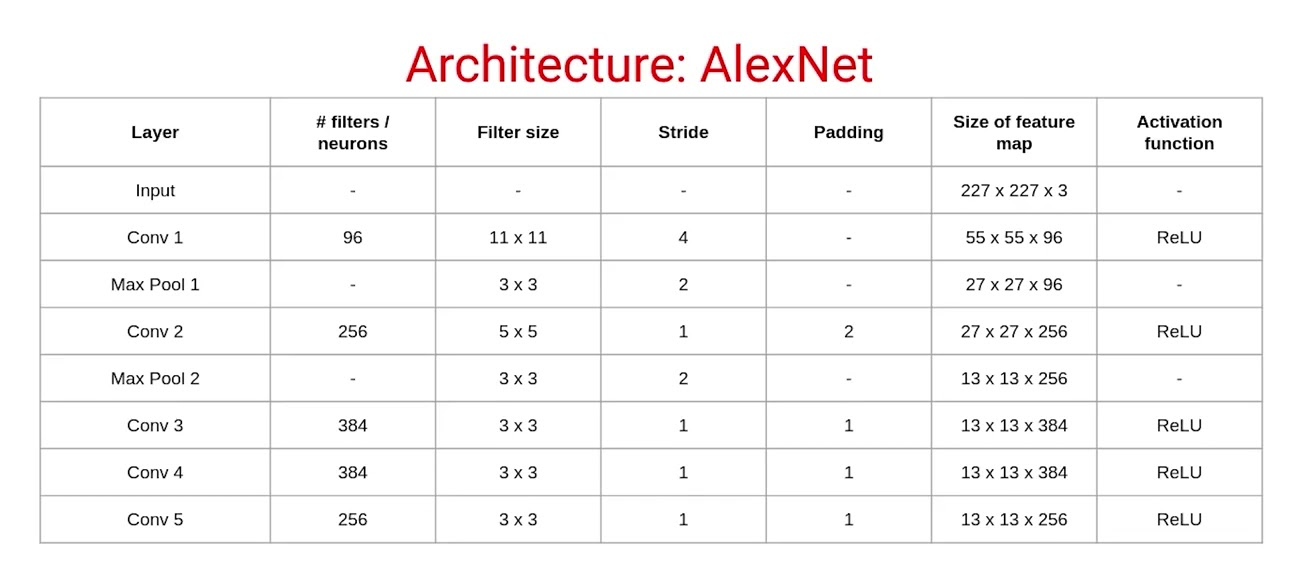

In [128]:
import os
import wget

alexnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

Using cache found in C:\Users\PanCh/.cache\torch\hub\pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\PanCh/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:47<00:00, 5.10MB/s] 


In [134]:
alexnet_model.eval()

if not os.path.exists("imagenet_classes.txt"):
    wget.download("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", out="imagenet_classes.txt")

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

if not os.path.exists("dog.jpg"):
    wget.download("https://github.com/pytorch/hub/raw/master/images/dog.jpg", out="dog.jpg")

from PIL import Image
from torchvision import transforms

input_image = Image.open("dog.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

<h3>Classification by using <b>AlexNet</b></h3>

Starting `forward pass` on saved image in variable `input_batch`, calling `alexnet` like other PyTorch models, finding a class with the highest score/ probability based on AlexNet by using `torch.argmax` and downloaded in labels dictionaries `categories` find mapped class.

In [136]:
with torch.no_grad():
    output = alexnet_model(input_batch)
    
probabilities = torch.nn.functional.softmax(output[0], dim=0)
predicted_class = torch.argmax(probabilities, dim=0)
predicted_category = categories[predicted_class]

print(f"Prediction: {predicted_category} ({probabilities[predicted_class].numpy()})")

Prediction: Samoyed (0.7244769930839539)


<h3>Control questions: [PL]</h3>

1. Opisz bardzo krótko, na czym polega działanie konwolucyjnych sieci neuronowych (CNN):

Odp.: Konwolucyjne sieci neuronowe wykorzystują nowe warstwy konwolucyjne, które wprowadzają filtry/ kernel dzięki, którym możemy znajdować pewne cechy na mapach bitowych. Pierwsze warstwy potrafią odkrywać takie elementy jak np.: linie proste, krzywe. Kolejne warstwy odkrywają już bardziej skomplikowane wzorce np.: twarz lub oczy.

Innymi słowy konwolucyjne sieci neuronowe otrzymują na wejście obrazek/ mapę bitową, która następnie jest przemiatana z filtrami, które są predefiniowane. Rezultatem jest mapa cech (feature map), która następnie przechodzi przez funkcję aktywacjie (np.: ReLU), która wprowadza nieliniowość oraz redukuje wartości ujemne. Następnie otrzymana mapa cech może przejśc przez warstwę zmniejszania wymiarowości (Pooling - Max lub Average), który zmniejsza rozmiary otrzymanej mapy cech. Nastepnie możemy powtórzyć cały proces lub przejść do warstwy spłaszczenie macierzy do jednowymiarowego wektora, która później zostanie liniowo połączona z neuronami, które finalnie dadzą nam prawdopodobieństwo określonej klasy. Możemy użyć warstwy/ funkcji softmax do uzyskania wyników, których suma będzie 1.

Tradycyjne podejście przy użyciu sztucznych sieci neuronowych byłoby zbyt czasochłonne oraz niewydajne, dlatego powstały konwolucyjne sieci neuronowe, który wykorzystują konwolujcę dzięki filtrom (mapa/ macierz wag służąca do detekcji cech).

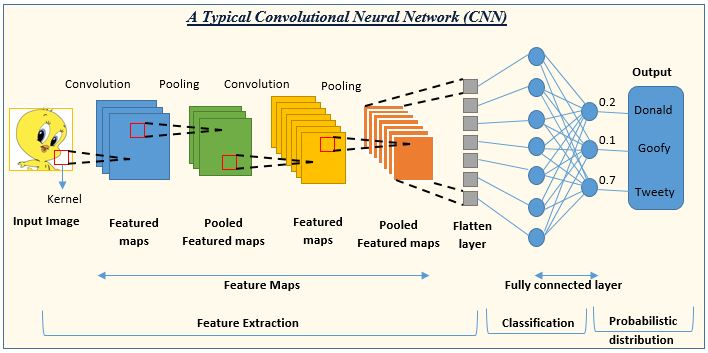

2. Na co wpływa wartość hiperparametru: kernel_size / padding / stride

- kernel_size - jest wielkość filtra, która wiąże się z analizą cech, najbardzie wydajny rozmiarem jest 5x5,
- padding - jest obwódka wokół przetwarzanej mapy cech lub wejściowego obrazka, która wypełnia "brakujące" pola,
- stride - jest przesunięcie jakie stosujemy podczas przemiatania.

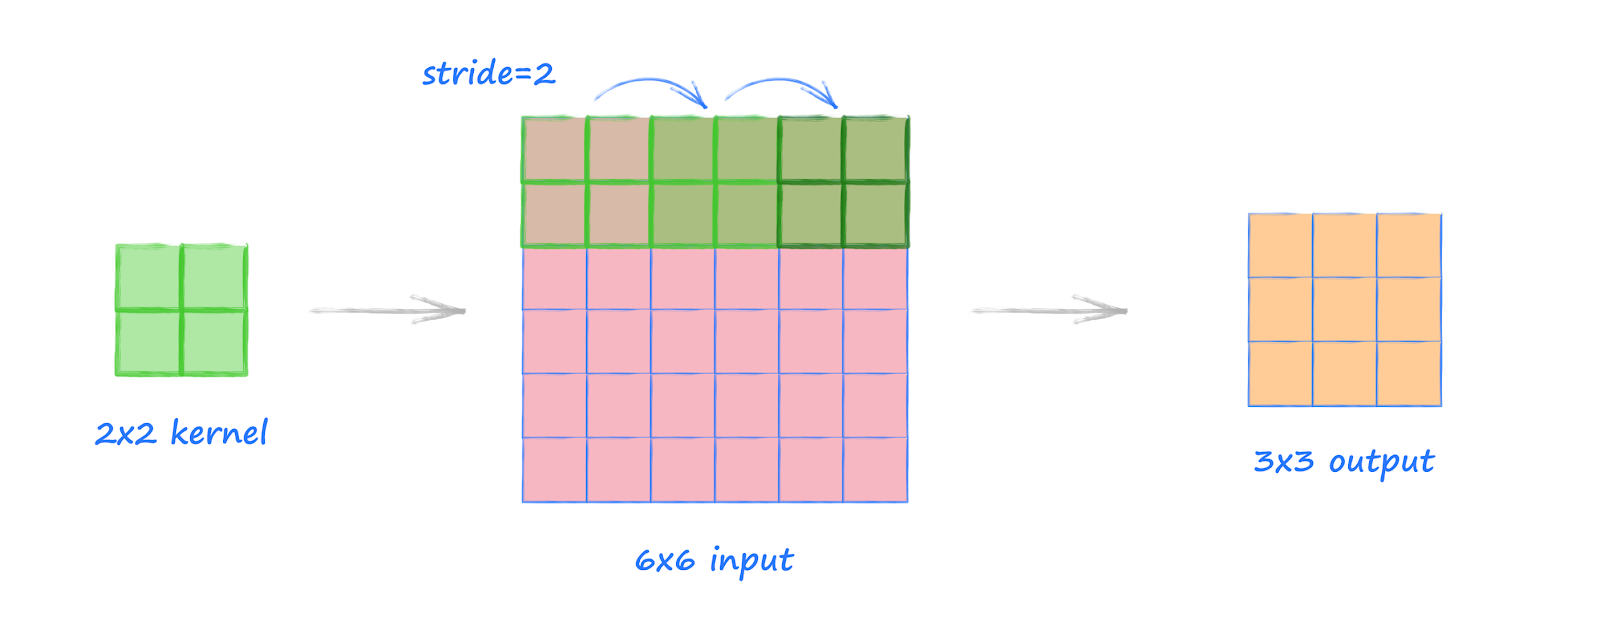
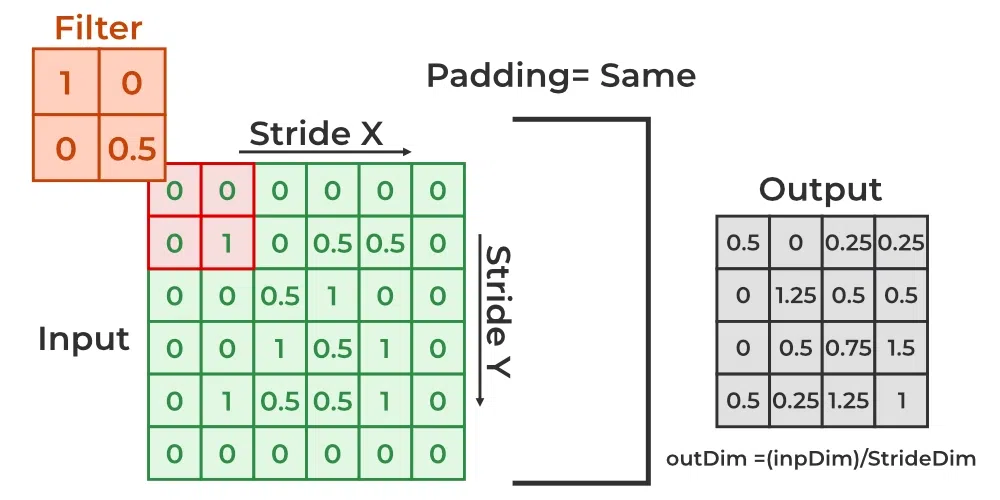

3. Z jakich warstw zazwyczaj składa się konwolucyjna sieć neuronowa:

Konwolucyjna sieć neuronowa zazwyczaj składa się z:
- warstwy konwolucyjnej (`Convolution`) - wykonują się operacje przemiatania przy pomocy filtrów,
- warstwy aktywacyjnej (`Activation`) - eleminuje wartości ujemne (wstawia tam 0) oraz dodaje nieliniowości np.: ReLU (Rectified Linear Unit),
- warstwy zbiorczej (`Pooling`) - zmniejsza obrazek/ mape cech (redukcja wymarowości),
- warstwy spłaszczającej (`Flatten`) - spłasza macierz to wektora 1D,
- warstwy liniowej (`Linear` lub `Dense`)- implementacja prostych linowych neuronów,
- warstwy dropout (`Dropout`)- wyłącza z pewnym prawdopobieństwem określony neuron,
- warstwy normalizacji zbiorowej (`BatchNormalization`) - normalizuje wartości macierzy.

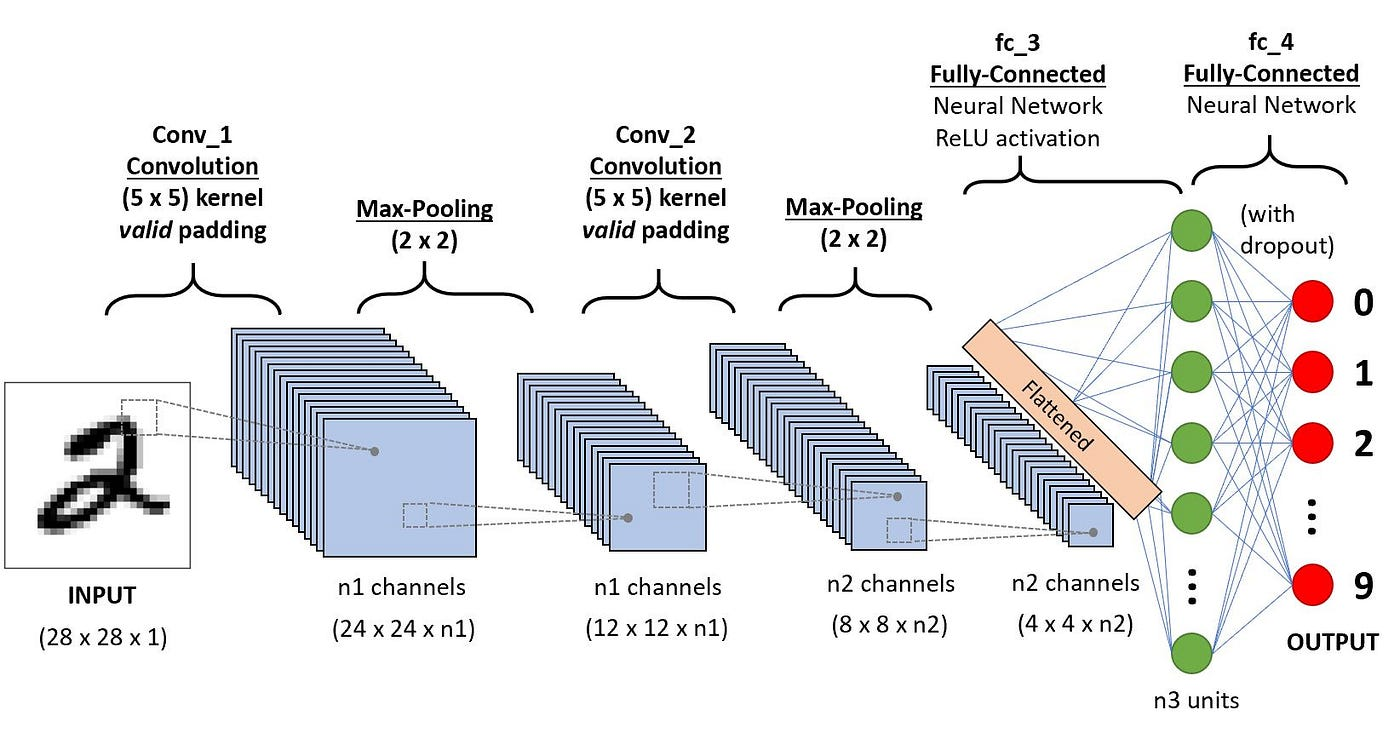